In [12]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

folder_name = 'Project-Iris-Ensemble-Model/Datasheet'
path = f'/content/drive/MyDrive/{folder_name}'

print("path: ", os.listdir(path))
try:
    X_train = pd.read_csv(os.path.join(path, 'X_train.csv'))
    X_test = pd.read_csv(os.path.join(path, 'X_test.csv'))
    y_train = pd.read_csv(os.path.join(path, 'y_train.csv'))
    y_test = pd.read_csv(os.path.join(path, 'y_test.csv'))

    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()

    print("size X_train:", X_train.shape)
except Exception as e:
    print("error", e)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
path:  ['iris.csv', 'X_test.csv', 'X_train.csv', 'y_train.csv', 'y_test.csv', 'rf_predictions.csv', 'model_rf.pkl', 'voting_predictions.csv', 'model_knn_data.pkl', 'model_logistic.pkl', '03_Boosting_Feature_Importance.png', 'model_adaboost.pkl', 'model_xgboost.pkl']
size X_train: (120, 4)


In [13]:
!pip install xgboost -q

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
#train
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
print("AdaBoost:", accuracy_score(y_test, ada_pred))


#train
xgb_model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost:", accuracy_score(y_test, xgb_pred))

AdaBoost: 0.9333333333333333


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:29:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: 0.9333333333333333


/tmp/ipython-input-2327752885.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')


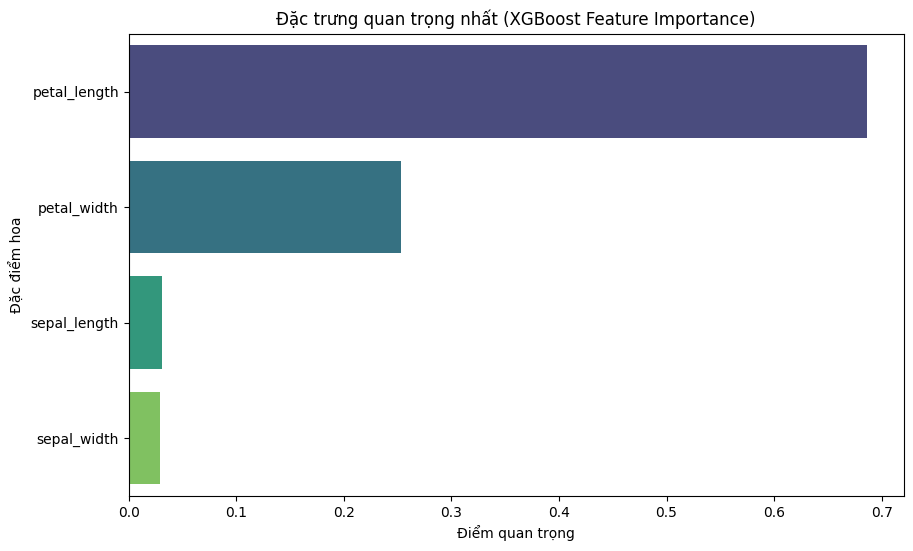

{'/content/drive/MyDrive/Project-Iris-Ensemble-Model/Datasheet/03_Boosting_Feature_Importance.png'}


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = xgb_model.feature_importances_
feature_names = X_train.columns
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

#diagram
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title('Đặc trưng quan trọng nhất (XGBoost Feature Importance)')
plt.xlabel('Điểm quan trọng')
plt.ylabel('Đặc điểm hoa')
img_path = os.path.join(path, '03_Boosting_Feature_Importance.png')
plt.savefig(img_path)
plt.show()

print({img_path})

In [16]:
#model_AdaBoost
ada_path = os.path.join(path, 'model_adaboost.pkl')
joblib.dump(ada_model, ada_path)
#model_XGBoost
xgb_path = os.path.join(path, 'model_xgboost.pkl')
joblib.dump(xgb_model, xgb_path)

print(f"exported model AdaBoost {ada_path}")
print(f"exported model XGBoost {xgb_path}")


exported model AdaBoost /content/drive/MyDrive/Project-Iris-Ensemble-Model/Datasheet/model_adaboost.pkl
exported model XGBoost /content/drive/MyDrive/Project-Iris-Ensemble-Model/Datasheet/model_xgboost.pkl
